In [1]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers

Using TensorFlow backend.


In [2]:
import numpy as np
import random
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

In [24]:
random.seed(777)  # for reproducibility
#하이퍼 파라미터 설정
learning_rate = 0.001
batch_size = 2
training_epochs = 150
nb_classes = 3
drop_rate = 0.05

In [4]:
x_train = pd.read_excel('0615X_train.xlsx')
x_test = pd.read_excel('0615X_test.xlsx')
y_train = pd.read_excel('0615Y_train.xlsx')
y_test = pd.read_excel('0615Y_test.xlsx')

x_train = x_train.iloc[:,0:63]
x_test = x_test.iloc[:,0:63]
y_train = y_train[['index']]
y_test = y_test[['index']]

x_train = x_train.to_numpy()
#print(type(x_train))
x_test = x_test.to_numpy()
#print(type(x_test))


y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 150)               9600      
_________________________________________________________________
dropout_12 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_13 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_14 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 150)              

1374/1374 [==============================] - 3s 2ms/sample - loss: 0.1632 - accuracy: 0.9702 - val_loss: 0.2378 - val_accuracy: 0.9767
Epoch 101/150
1374/1374 [==============================] - 3s 2ms/sample - loss: 0.1649 - accuracy: 0.9672 - val_loss: 0.1916 - val_accuracy: 0.9593
Epoch 102/150
1374/1374 [==============================] - 3s 2ms/sample - loss: 0.1795 - accuracy: 0.9607 - val_loss: 0.2146 - val_accuracy: 0.9564
Epoch 103/150
1374/1374 [==============================] - 3s 2ms/sample - loss: 0.1757 - accuracy: 0.9636 - val_loss: 0.2150 - val_accuracy: 0.9680
Epoch 104/150
1374/1374 [==============================] - 4s 3ms/sample - loss: 0.1490 - accuracy: 0.9767 - val_loss: 0.1873 - val_accuracy: 0.9709
Epoch 105/150
1374/1374 [==============================] - 4s 3ms/sample - loss: 0.1776 - accuracy: 0.9694 - val_loss: 0.1886 - val_accuracy: 0.9709
Epoch 106/150
1374/1374 [==============================] - 4s 3ms/sample - loss: 0.1622 - accuracy: 0.9672 - val_loss: 0

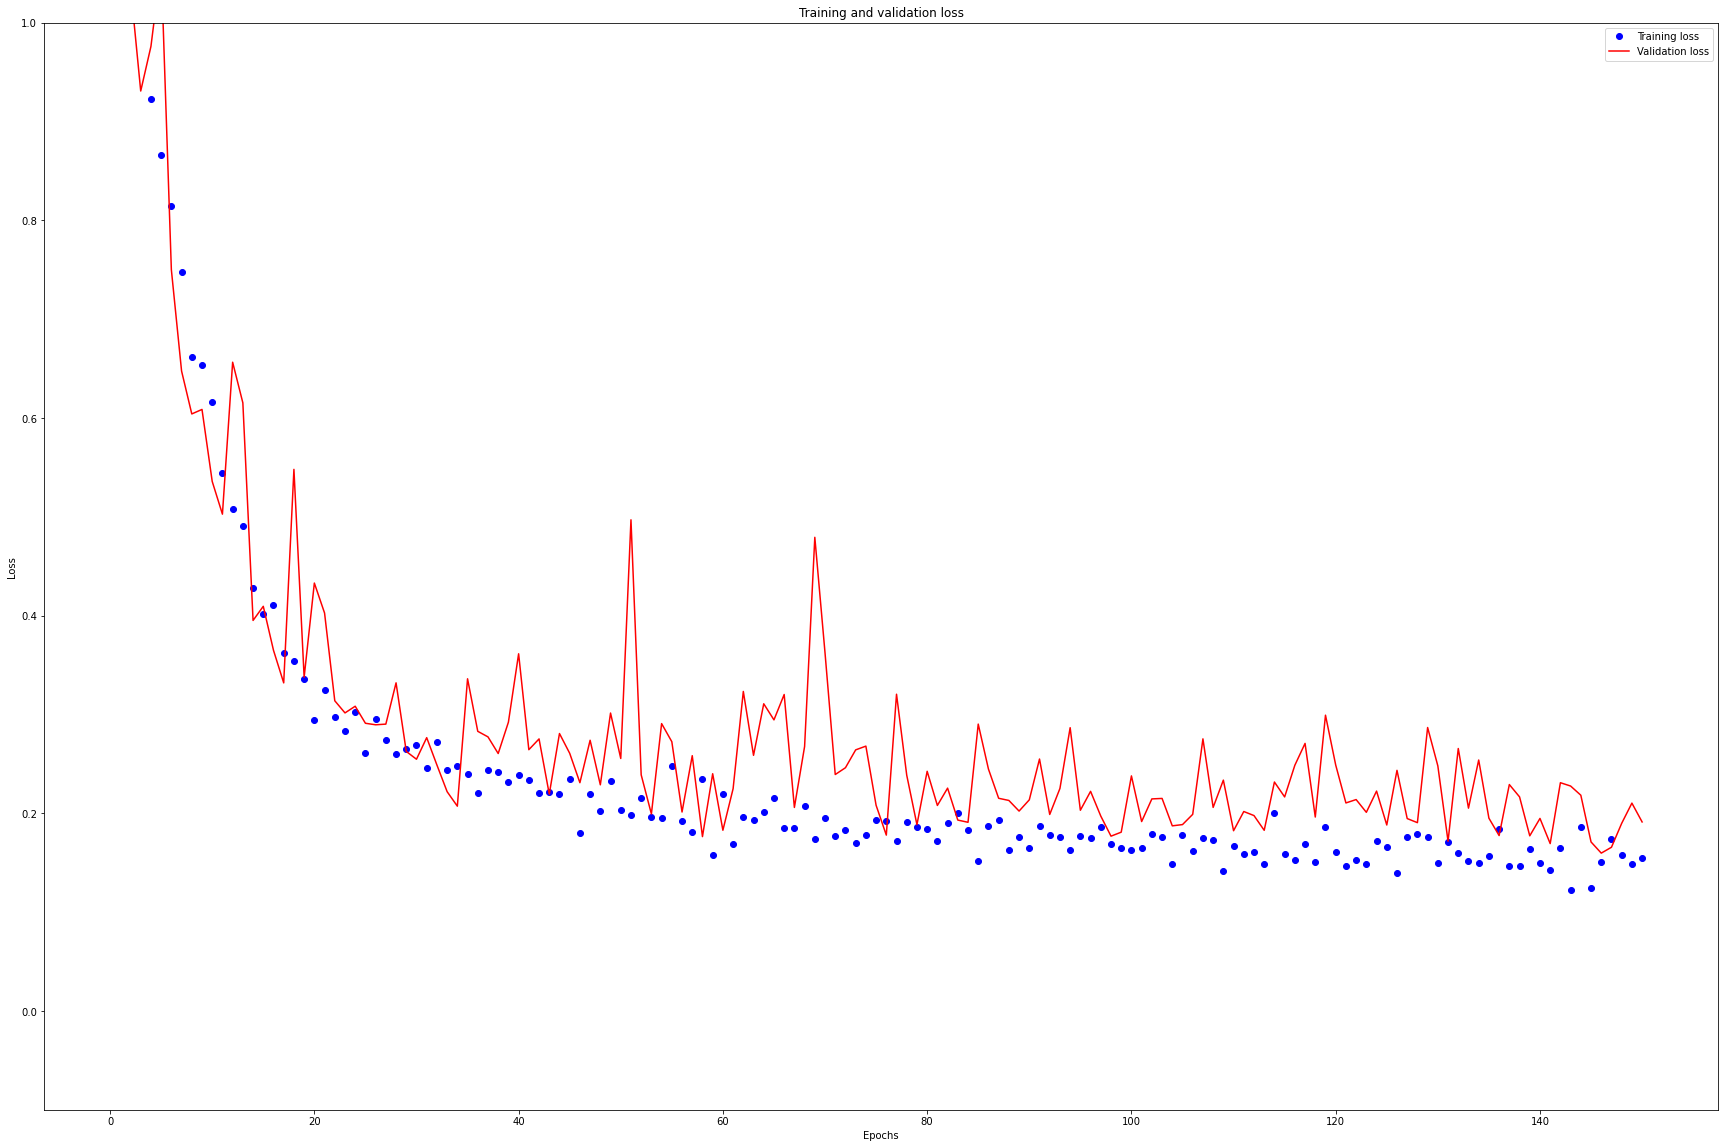

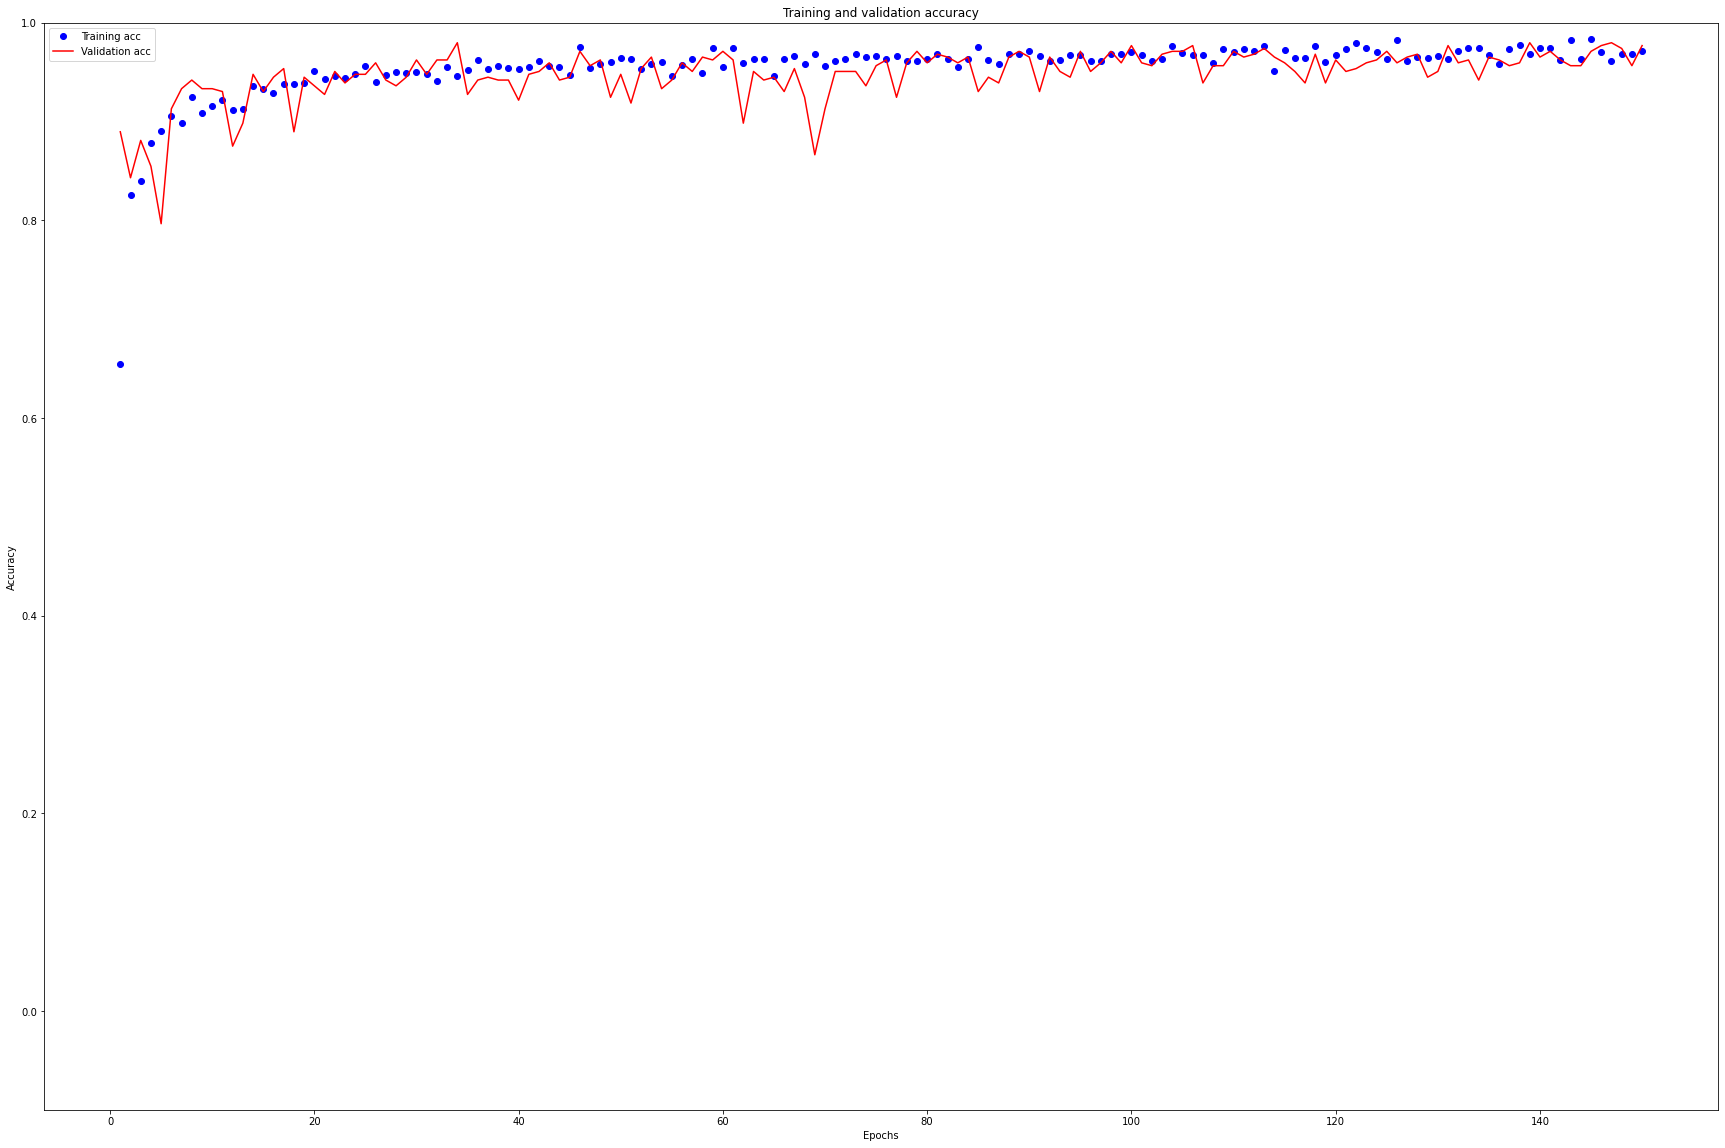

index:  117 actual y:  0 predicted y:  0
index:  228 actual y:  0 predicted y:  0
index:  228 actual y:  0 predicted y:  0
index:  188 actual y:  2 predicted y:  2
index:  294 actual y:  2 predicted y:  2
index:  138 actual y:  2 predicted y:  2
index:  172 actual y:  1 predicted y:  1
index:  275 actual y:  2 predicted y:  2
index:  20 actual y:  0 predicted y:  0
index:  228 actual y:  0 predicted y:  0
344/344 [==============================] - 1s 2ms/sample - loss: 0.1912 - accuracy: 0.9767
loss:  0.19124917651331702
accuracy 0.9767442


In [25]:
tf.model = tf.keras.Sequential()

tf.model.add(tf.keras.layers.Dense(input_dim=63, units=150, kernel_initializer='he_normal',
                                   kernel_regularizer=regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=150, kernel_initializer='he_normal', 
                                   kernel_regularizer=regularizers.l2(0.001),activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=150, kernel_initializer='he_normal', 
                                   kernel_regularizer=regularizers.l2(0.001),activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=150, kernel_initializer='he_normal',
                                   kernel_regularizer=regularizers.l2(0.001),activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()

#history = tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)
history = tf.model.fit(x_train, y_train,epochs = training_epochs,batch_size = batch_size,validation_data=(x_test,y_test))

import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  # ‘bo’는 파란색 점을 의미합니다.
plt.plot(epochs, val_loss, 'r', label='Validation loss') # ‘b’는 파란색 실선을 의미합니다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.rcParams['figure.figsize'] = (30,20)
plt.legend()
plt.ylim(-0.1, 1.0)

plt.show()

plt.clf() # 그래프를 초기화합니다.
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(-0.1, 1.0)

plt.show()


# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

# evaluate test set
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])
